In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = sns.load_dataset("tips")

In [5]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
    if data[i].dtype == "object" or data[i].dtype == "category":
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])

In [11]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [14]:
x= data.drop("tip",axis= 1)

In [15]:
y = data["tip"]

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [18]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
res = Ridge(alpha=1.0)
grid = GridSearchCV(res,parameter,scoring = "neg_mean_squared_error",cv = 10)
ag = grid.fit(x_train,y_train)


In [24]:
ag

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [19]:
parameter = {"alpha":[1,2,3,4,5,6,7,8,9,10]}


In [25]:
ag.best_params_

{'alpha': 10}

In [26]:
ag.best_score_

np.float64(-1.0245066845594277)

In [27]:
  reg_pred = ag.predict(x_test)

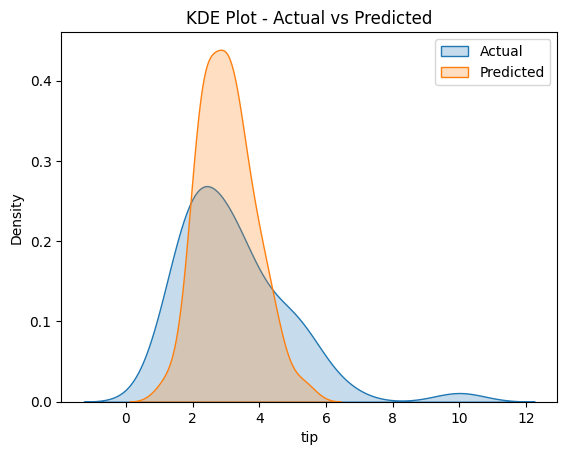

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(reg_pred, label='Predicted', fill=True)
plt.legend()
plt.title("KDE Plot - Actual vs Predicted")
plt.show()


In [43]:
lass = Lasso()

In [44]:
lass = Lasso()
grid2 = GridSearchCV(lass,parameter,scoring = "neg_mean_squared_error",cv = 10)
ag = grid2.fit(x_train,y_train)


In [45]:
ag

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [46]:
ag.score(x_test,y_test)

-2.731269448617317

In [47]:
ag.best_params_

{'alpha': 1}

In [48]:
ag.best_score_

np.float64(-1.7300485470754723)

In [49]:
lasso_pred = ag.predict(x_test)

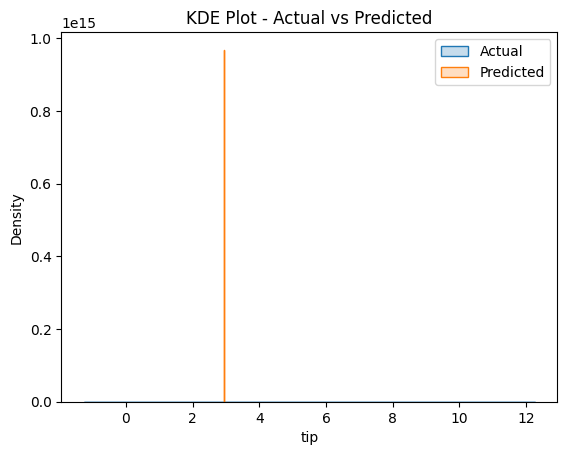

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(lasso_pred, label='Predicted', fill=True)
plt.legend()
plt.title("KDE Plot - Actual vs Predicted")
plt.show()
